In [1]:
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torchvision
from PIL import Image

In [2]:
path = "C:\\Users\\Yulia\\Desktop\\diploma\\nutrition5k_dataset\\imagery\\side_angles\\dish_1560368815\\camera_A_frame_005.jpeg"


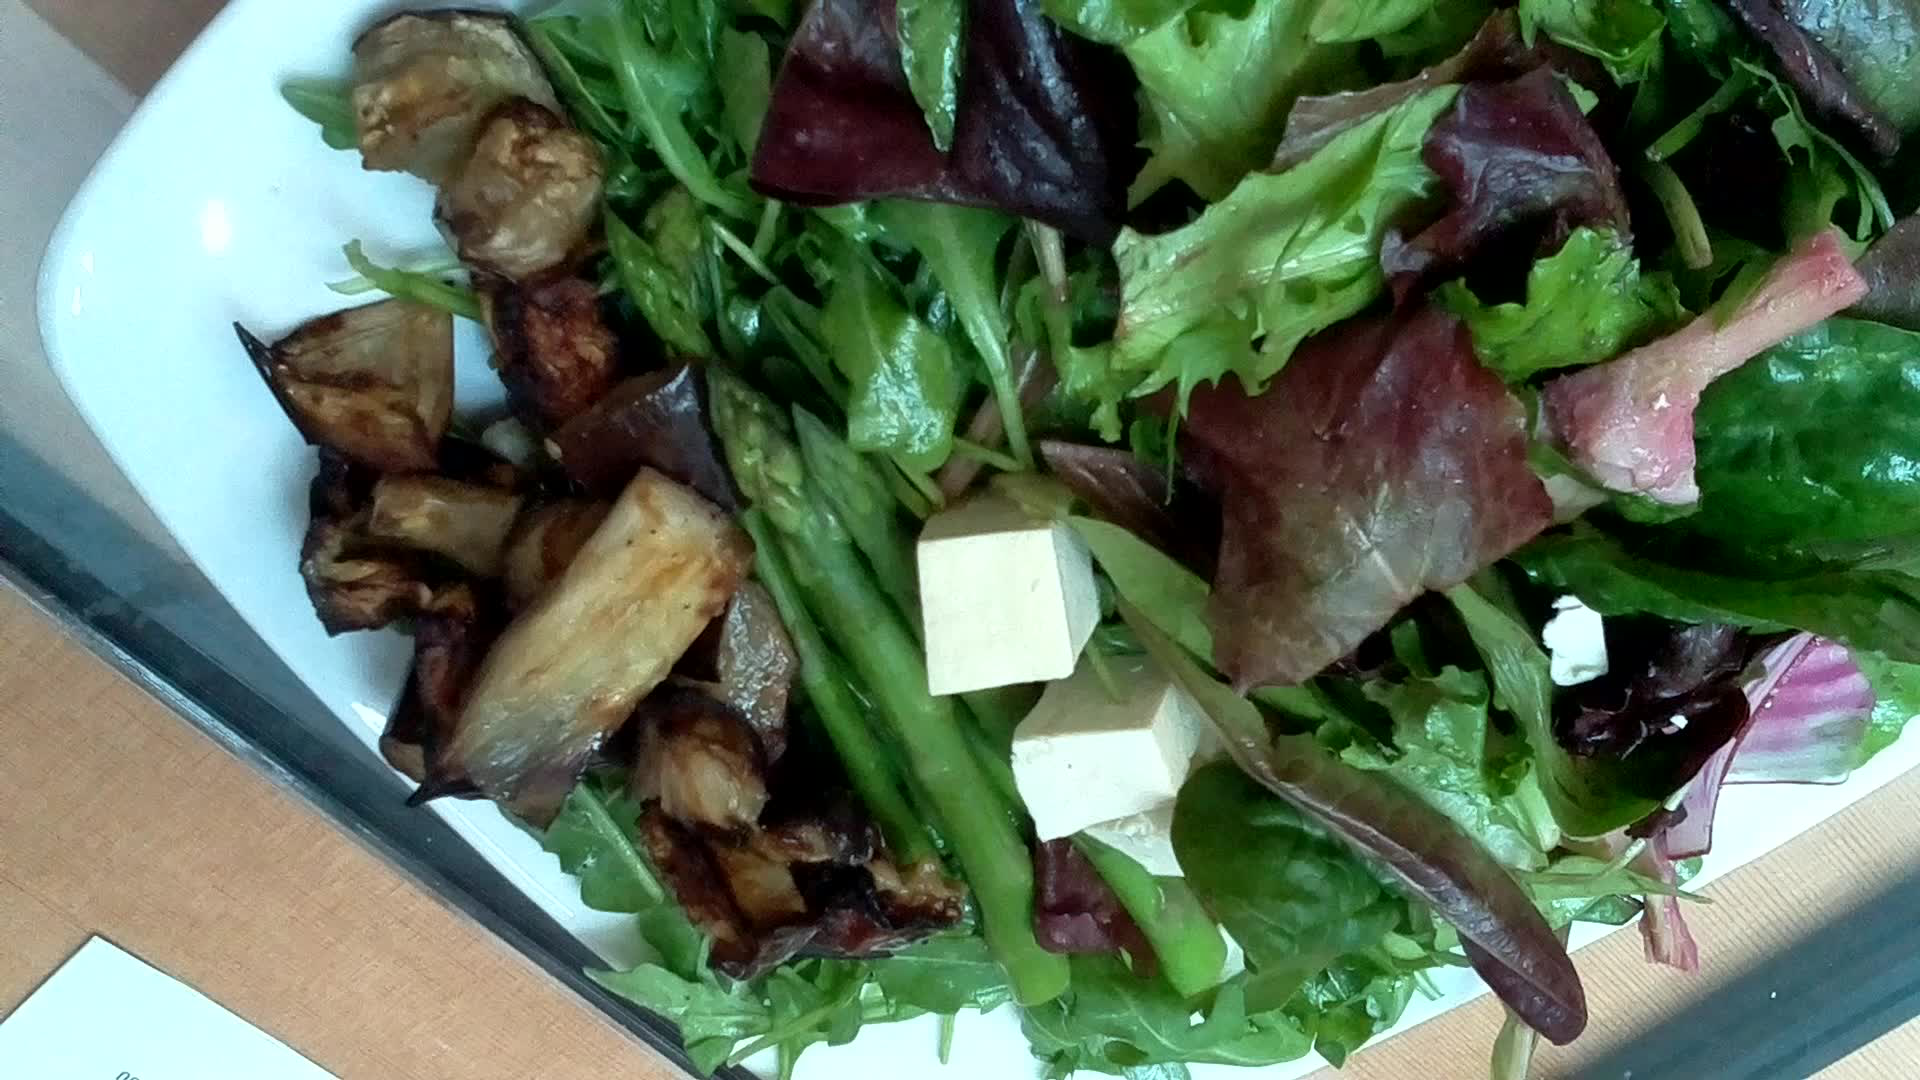

In [14]:
Image.open(path)

In [3]:
transform = transforms.Compose([
    transforms.PILToTensor()
])
tensor_img = transform(Image.open(path))

In [4]:
tensor_img.shape

torch.Size([3, 1080, 1920])

In [5]:
tensor_img

tensor([[[144, 145, 146,  ...,  74,  71,  69],
         [151, 151, 152,  ...,  77,  73,  70],
         [147, 148, 148,  ...,  82,  75,  71],
         ...,
         [214, 214, 214,  ..., 221, 222, 224],
         [214, 214, 214,  ..., 229, 223, 217],
         [214, 214, 214,  ..., 235, 224, 213]],

        [[162, 163, 164,  ...,  95,  92,  90],
         [169, 169, 170,  ...,  98,  94,  91],
         [165, 166, 166,  ..., 103,  96,  92],
         ...,
         [255, 255, 255,  ..., 223, 224, 226],
         [255, 255, 255,  ..., 231, 225, 219],
         [255, 255, 255,  ..., 237, 226, 215]],

        [[162, 163, 164,  ...,  76,  73,  71],
         [169, 169, 170,  ...,  79,  75,  72],
         [165, 166, 166,  ...,  86,  77,  73],
         ...,
         [255, 255, 255,  ..., 209, 210, 212],
         [255, 255, 255,  ..., 217, 211, 205],
         [255, 255, 255,  ..., 223, 212, 201]]], dtype=torch.uint8)

ToPILImag: Converts a torch.\*Tensor of shape C x H x W or a numpy ndarray of shape H x W x C to a PIL Image while preserving the value range.  
Resize: Resize the input image to the given size.  
RandomResizedCrop: Crop a random portion of image and resize it to a given size.  
RandomHorizontalFlip: Horizontally flip the given image randomly with a given probability.

In [13]:
food_image_transform = transforms.Compose(
    [
        transforms.ToPILImage(),
        transforms.Resize((224, 224)),
#         transforms.RandomResizedCrop(224, scale=(0.7, 1.0), ratio=(0.9, 1.1)),
        transforms.RandomHorizontalFlip(),
        # transforms.Resize((224, 224)),
        # imageNet normalization
        transforms.ToTensor(),
        transforms.Normalize(
          mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
        )
    ]
)

In [7]:
transformed = food_image_transform(tensor_img)

In [8]:
transformed.shape

torch.Size([3, 224, 224])

In [9]:
transformed

tensor([[[-0.7650, -0.7308, -0.6452,  ...,  0.3652,  0.5022,  0.4508],
         [-0.8164, -0.7479, -0.5767,  ...,  0.5022,  0.4851,  0.4337],
         [-0.9192, -0.6281, -0.2513,  ...,  0.5536,  0.4851,  0.4508],
         ...,
         [ 1.8208,  1.7865,  1.7694,  ...,  1.5468,  1.5297,  1.5297],
         [ 1.8037,  1.8037,  1.8037,  ...,  1.5639,  1.5468,  1.5468],
         [ 1.8037,  1.7694,  1.8037,  ...,  1.5639,  1.5468,  1.5468]],

        [[-0.2850, -0.2500, -0.0049,  ...,  0.7129,  0.9405,  0.9055],
         [-0.3025, -0.1975,  0.1352,  ...,  0.8529,  0.9230,  0.8880],
         [-0.3375,  0.0126,  0.5728,  ...,  0.9055,  0.9230,  0.9055],
         ...,
         [ 2.0434,  2.0084,  1.9909,  ...,  2.4286,  2.4286,  2.4286],
         [ 2.0084,  2.0084,  2.0259,  ...,  2.4286,  2.4286,  2.4286],
         [ 2.0084,  1.9909,  2.0259,  ...,  2.4286,  2.4286,  2.4286]],

        [[-0.3230, -0.1835,  0.1476,  ...,  0.8622,  1.1411,  1.1237],
         [-0.3055, -0.0964,  0.3219,  ...,  1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


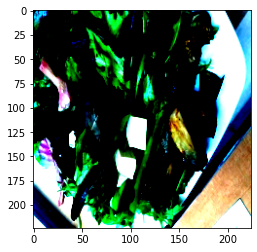

In [10]:
import matplotlib.pyplot as plt
plt.imshow(transformed.permute(1,2,0))
plt.show()

_____

In [1]:
from torch.utils.data import Dataset
from torchvision import transforms
import json
import os
import numpy as np
from skimage import io
import shutil
from tqdm.notebook import tqdm
import pandas as pd

In [2]:
path_json = 'C:\\Users\\Yulia\\Desktop\\diploma\\nutrition5k_dataset\\metadata\\dict_with_carbs_clean.json'

In [3]:
with open(path_json) as json_file:
    data = json.load(json_file)

In [4]:
def read_txt(path):
    return pd.read_csv(path, header=None, names=['dish_ID'])

In [5]:
data_id_test = read_txt('C:\\Users\\Yulia\\Desktop\\diploma\\nutrition5k_dataset\\dish_ids\\splits\\rgb_test_ids.txt')
data_id_train = read_txt('C:\\Users\\Yulia\\Desktop\\diploma\\nutrition5k_dataset\\dish_ids\\splits\\rgb_train_ids.txt')
data_id_depth_test = read_txt('C:\\Users\\Yulia\\Desktop\\diploma\\nutrition5k_dataset\\dish_ids\\splits\\depth_test_ids.txt')
data_id_depth_train = read_txt('C:\\Users\\Yulia\\Desktop\\diploma\\nutrition5k_dataset\\dish_ids\\splits\\depth_train_ids.txt')

In [6]:
path_with_dir = "C:\\Users\\Yulia\\Desktop\\diploma\\nutrition5k_dataset\\imagery\\side_angles"

In [7]:
list_of_dishes = os.listdir(path_with_dir)
list_of_dishes_cleaned = list(data.keys())

In [8]:
path_to_save = "C:\\Users\\Yulia\\Desktop\\Carbohydrate-counting\\images"

In [9]:
list_of_all_images_names = []
list_of_all_values = []

list_of_all_images_names_train = []
list_of_all_values_train = []

list_of_all_images_names_test = []
list_of_all_values_test = []

In [10]:
count = 0
for i in tqdm(list_of_dishes_cleaned):
    try:
        get_name_of_images = os.listdir(path_with_dir + '\\' + str(i))
        list_of_all_values.extend([data[str(i)]] * len(get_name_of_images))
        for img in get_name_of_images:
            list_of_all_images_names.append(str(str(i) + '_' + str(img)))
            original = path_with_dir + '\\' + str(i) + '\\' + str(img)
            if i in list(data_id_test['dish_ID']):   
                list_of_all_images_names_test.append(str(str(i) + '_' + str(img)))
                target = path_to_save + '\\test\\' + str(i) + '_' + str(img)
                list_of_all_values_test.append(data[str(i)])
            elif i in list(data_id_train['dish_ID']):
                list_of_all_images_names_train.append(str(str(i) + '_' + str(img)))
                target = path_to_save + '\\train\\' + str(i) + '_' + str(img)
                list_of_all_values_train.append(data[str(i)])
            shutil.copyfile(original, target)                
    except:
        count += 1
print(count)

  0%|          | 0/4999 [00:00<?, ?it/s]

213


In [11]:
print(len(list_of_all_images_names), len(list_of_all_values))

132853 132853


In [12]:
print(len(list_of_all_images_names_train), len(list_of_all_values_train))

111772 111772


In [13]:
print(len(list_of_all_images_names_test), len(list_of_all_values_test))

18294 18294


In [20]:
print(len(list_of_all_images_names_test) + len(list_of_all_images_names_train))

130066


In [21]:
print(len(list_of_all_values_train) + len(list_of_all_values_test))

130066


In [27]:
json_train = {}
for i in range(len(list_of_all_images_names_train)):
    json_train[str(list_of_all_images_names_train[i])] = list_of_all_values_train[i]
with open('json_train.json', 'w') as fp:
    json.dump(json_train, fp)


In [29]:
len(json_train.items())

111772

In [28]:
json_test = {}
for i in range(len(list_of_all_images_names_test)):
    json_test[str(list_of_all_images_names_test[i])] = list_of_all_values_test[i]
with open('json_test.json', 'w') as fp:
    json.dump(json_test, fp)

In [30]:
len(json_test.items())

18294

_____

In [7]:
from torch.utils.data import Dataset
from torchvision import transforms
import json
import os
import numpy as np
from skimage import io
from torch.utils.data import DataLoader
from tqdm.notebook import tqdm

In [2]:
def transform_data(element):
    return np.array([element], dtype=np.float32)

In [3]:
food_image_transform = transforms.Compose([transforms.ToPILImage(),
                                        transforms.Resize((224, 224)),
                                        transforms.RandomHorizontalFlip(),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

In [4]:
class FoodDataset(Dataset):
    def __init__(self, *, carbs_file, image_dir):
        self.image_dir = image_dir
        self.transform = food_image_transform
        with open(carbs_file) as json_file:
            self.data = json.load(json_file)
        self.carbs_values_tuples = tuple(self.data.items())
            
    def __len__(self):
        return len(list(self.data.items()))
    
    def __getitem__(self, idx):
        element = self.carbs_values_tuples[idx]
        img_name = os.path.join(self.image_dir, element[0])
        
        sample = {"fname": element[0], "image": io.imread(img_name)}
        value = transform_data(element[1])
        sample['carbs'] = value
        if self.transform:
            sample["image"] = self.transform(sample["image"])

        return sample
        
        
        

In [5]:
dataset = FoodDataset(carbs_file="json_test.json", image_dir="C:\\Users\\Yulia\\Desktop\\Carbohydrate-counting\\images\\test")

In [6]:
q = DataLoader(dataset, batch_size=128, shuffle=True, pin_memory=True)

In [ ]:
for i in tqdm(q):
    print(i['image'].shape)

  0%|          | 0/143 [00:00<?, ?it/s]

torch.Size([128, 3, 224, 224])
torch.Size([128, 3, 224, 224])
torch.Size([128, 3, 224, 224])
torch.Size([128, 3, 224, 224])
torch.Size([128, 3, 224, 224])
torch.Size([128, 3, 224, 224])
torch.Size([128, 3, 224, 224])
torch.Size([128, 3, 224, 224])
torch.Size([128, 3, 224, 224])
torch.Size([128, 3, 224, 224])
torch.Size([128, 3, 224, 224])
torch.Size([128, 3, 224, 224])
torch.Size([128, 3, 224, 224])
torch.Size([128, 3, 224, 224])
torch.Size([128, 3, 224, 224])
torch.Size([128, 3, 224, 224])


____

In [7]:
import torch
import torch.nn as nn

In [17]:
a = torch.tensor([[ 0.2745],
        [ 0.3677],
        [ 0.2496],
        [ 0.2766],
        [ 0.3303],
        [ 0.7516],
        [ 0.3471],
        [ 0.5089],
        [ 0.5906],
        [ 0.1232],
        [ 0.3847],
        [ 0.3298],
        [ 0.6371],
        [ 0.4679],
        [ 0.4486],
        [ 0.4650],
        [ 0.0671],
        [-0.0424],
        [ 0.1015],
        [ 0.3336],
        [ 0.1285],
        [ 0.1102],
        [ 0.6070],
        [ 0.5497],
        [ 0.6054],
        [ 0.4322],
        [ 0.6466],
        [ 0.4588],
        [ 0.0520],
        [ 0.5269],
        [ 0.4330],
        [ 0.4991],
        [ 0.3900],
        [ 0.7110],
        [ 0.4970],
        [ 0.5592],
        [ 0.5093],
        [ 0.3917],
        [ 0.3955],
        [ 0.3723],
        [ 0.0546],
        [ 0.2881],
        [ 0.4673],
        [ 0.4571],
        [ 0.5849],
        [ 0.1883],
        [ 0.0801],
        [ 0.3637],
        [ 0.2845],
        [ 0.3749]])

In [18]:
b = torch.tensor([[ -0.0600],
        [12.1980],
        [ -5.4660],
        [ 9.7200],
        [-15.0000],
        [ -0.0000],
        [ 3.8610],
        [ -2.4080],
        [-21.4690],
        [ -5.1374],
        [-21.6500],
        [-46.7410],
        [13.6740],
        [ 8.2800],
        [ 1.3000],
        [16.6860],
        [ 7.8480],
        [ 7.4637],
        [45.1234],
        [ 1.6000],
        [ 7.0200],
        [10.9690],
        [20.5700],
        [13.9500],
        [25.5240],
        [13.8600],
        [ 0.6270],
        [17.5600],
        [ 7.7460],
        [23.1400],
        [ 8.6123],
        [48.3410],
        [ 7.2300],
        [15.9600],
        [ -7.6939],
        [ -0.2730],
        [- 9.4500],
        [-32.1460],
        [- 7.5600],
        [-26.0503],
        [28.9360],
        [ 2.7720],
        [23.4550],
        [24.4200],
        [ 0.1560],
        [ 0.0000],
        [15.6557],
        [22.9710],
        [ 6.1610],
        [ 1.4040]])

In [23]:
loss = nn.L1Loss(reduction='none')

In [29]:
loss(torch.tensor([[3.0], [134.0]]), torch.tensor([[3.4], [2.0]]))

tensor([[  0.4000],
        [132.0000]])

In [26]:
loss(a,b)

tensor([[3.3450e-01],
        [1.1830e+01],
        [5.7156e+00],
        [9.4434e+00],
        [1.5330e+01],
        [7.5160e-01],
        [3.5139e+00],
        [2.9169e+00],
        [2.2060e+01],
        [5.2606e+00],
        [2.2035e+01],
        [4.7071e+01],
        [1.3037e+01],
        [7.8121e+00],
        [8.5140e-01],
        [1.6221e+01],
        [7.7809e+00],
        [7.5061e+00],
        [4.5022e+01],
        [1.2664e+00],
        [6.8915e+00],
        [1.0859e+01],
        [1.9963e+01],
        [1.3400e+01],
        [2.4919e+01],
        [1.3428e+01],
        [1.9600e-02],
        [1.7101e+01],
        [7.6940e+00],
        [2.2613e+01],
        [8.1793e+00],
        [4.7842e+01],
        [6.8400e+00],
        [1.5249e+01],
        [8.1909e+00],
        [8.3220e-01],
        [9.9593e+00],
        [3.2538e+01],
        [7.9555e+00],
        [2.6423e+01],
        [2.8881e+01],
        [2.4839e+00],
        [2.2988e+01],
        [2.3963e+01],
        [4.2890e-01],
        [1

________

Загрузка сохраненной модели 

In [2]:
path_model = "C:\\Users\\Yulia\\Desktop\\Carbohydrate-counting\\runs\\2022-05-19T05.15.41-resnet_50_night-resnet50-carbs\\epoch_10.pt"                 

___

In [2]:
img_path = "C:\\Users\\Yulia\\Desktop\\Carbohydrate-counting\\images\\train\\dish_1550704750_camera_A_frame_105.jpeg"

In [4]:
img = Image.open(img_path)

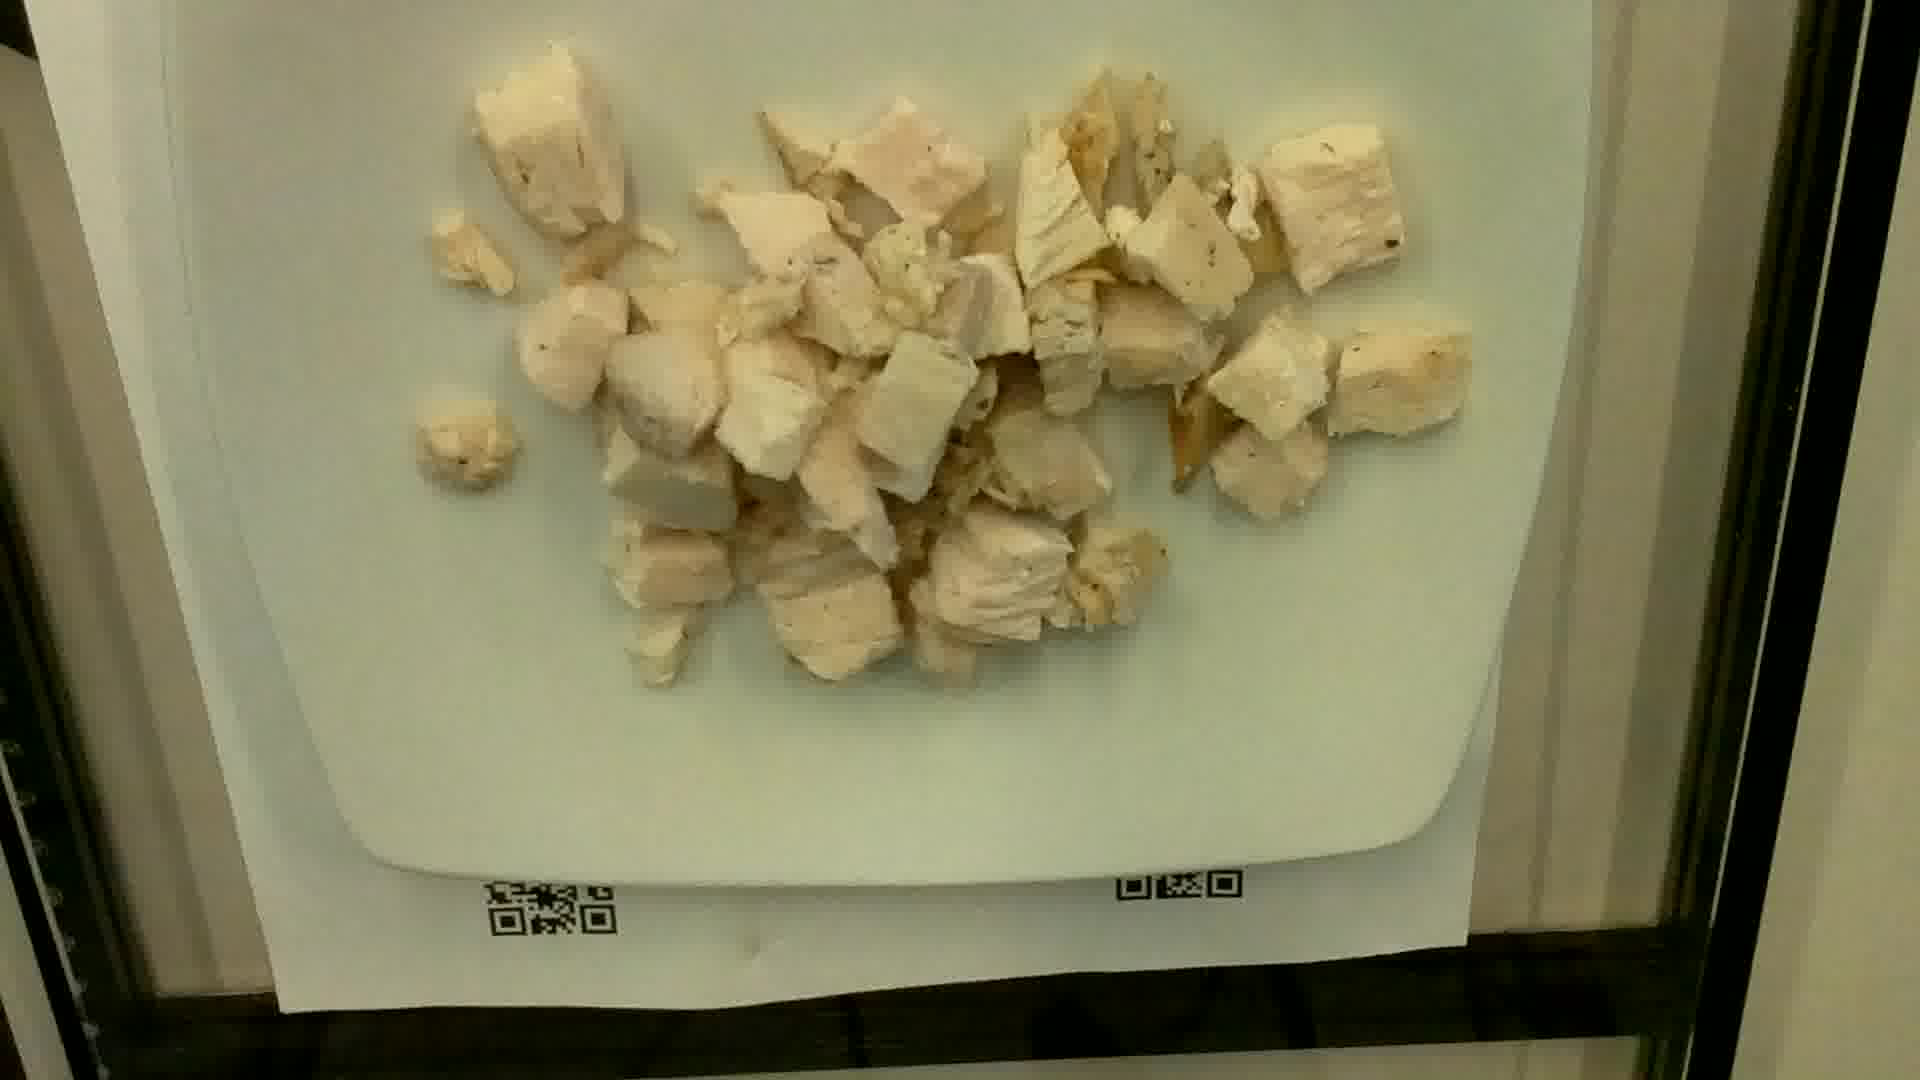

In [5]:
img

In [7]:
import argparse
from skimage import io
import torch

In [11]:
io.imread(img_path).shape

(1080, 1920, 3)

In [20]:
transform = transforms.Compose([
    transforms.PILToTensor()
])
tensor_img = transform(Image.open(img_path))
tensor_img = tensor_img

In [19]:
tensor_img.shape

torch.Size([1080, 1920, 3])

In [15]:
food_image_transform = transforms.Compose(
    [
        transforms.ToPILImage(),
        transforms.Resize((224, 224)),
#         transforms.RandomResizedCrop(224, scale=(0.7, 1.0), ratio=(0.9, 1.1)),
        transforms.RandomHorizontalFlip(),
        # transforms.Resize((224, 224)),
        # imageNet normalization
        transforms.ToTensor(),
        transforms.Normalize(
          mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
        )
    ]
)

In [21]:
food_image_transform(tensor_img)

tensor([[[-1.8953, -1.8610, -0.9020,  ..., -2.1179, -2.1179, -2.1179],
         [-1.8953, -1.8439, -1.1418,  ..., -2.1179, -2.1179, -2.1179],
         [-1.9124, -1.8097, -1.3302,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-1.9124, -1.8953, -1.3302,  ...,  0.2796,  0.2967,  0.2796],
         [-1.9467, -1.9124, -1.5185,  ...,  0.2624,  0.2796,  0.2796],
         [-1.9638, -1.9124, -1.6213,  ...,  0.2453,  0.2624,  0.2796]],

        [[-1.7556, -1.7381, -0.8627,  ..., -2.0182, -2.0007, -2.0007],
         [-1.7556, -1.7381, -1.1078,  ..., -2.0182, -2.0007, -2.0007],
         [-1.7731, -1.7031, -1.3004,  ..., -2.0182, -2.0007, -2.0007],
         ...,
         [-1.9482, -1.9307, -1.3529,  ...,  0.3277,  0.2752,  0.2402],
         [-1.9307, -1.9132, -1.5455,  ...,  0.3452,  0.3102,  0.2927],
         [-1.9307, -1.8957, -1.6506,  ...,  0.3452,  0.3277,  0.3277]],

        [[-1.8044, -1.8044, -1.0027,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.8044, -1.2293,  ..., -1

In [49]:
img_tensor = food_image_transform(io.imread(img_path))

In [50]:
img_tensor.shape

torch.Size([3, 224, 224])

In [51]:
img_tensor = img_tensor.reshape((1, *img_tensor.shape))

In [52]:
img_tensor.shape

torch.Size([1, 3, 224, 224])

In [36]:
import numpy as np

In [105]:
def put_text(imgs, texts):
    result = np.empty_like(imgs)
    for i, (img, text) in enumerate(zip(imgs, texts)):
        from PIL import Image
        from PIL import ImageFont
        from PIL import ImageDraw
        print(img.shape)
        img = (img.permute((1, 2, 0))).cpu().detach().numpy()
#         img = img.cpu().detach().numpy()
        img = Image.fromarray(img.astype("uint8"), "RGB")

        draw = ImageDraw.Draw(img)
#         font = ImageFont.truetype("/usr/share/fonts/TTF/LiberationSans-Regular.ttf", 12)
        # draw.text((x, y),"Sample Text",(r,g,b))
        draw.text((0, 0), text, (255, 255, 255))
        print(np.array(img).shape)
        result[i] = (np.asarray(img).astype("float32")).transpose((2, 0, 1))
        print(result[i].shape)
        result[i] = (result[i] - result[i].min()) / (result[i].max() - result[i].min())
    return result

In [126]:
def put_text(imgs, texts):
    result = np.empty_like(imgs)
    for i, (img, text) in enumerate(zip(imgs, texts)):
        from PIL import Image
        from PIL import ImageFont
        from PIL import ImageDraw

        img = Image.fromarray((img.transpose((1, 2, 0))).astype("uint8"), "RGB")

        draw = ImageDraw.Draw(img)
#         font = ImageFont.truetype("/usr/share/fonts/TTF/LiberationSans-Regular.ttf", 12)
        # draw.text((x, y),"Sample Text",(r,g,b))
        draw.text((0, 0), text, (255, 255, 255))
        result[i] = (np.asarray(img).astype("float32")).transpose((2, 0, 1))
        result[i] = (result[i] - result[i].min()) / (result[i].max() - result[i].min())
    return result

In [112]:
img_tensor_cpu = img_tensor.view(-1, 3, 224, 224).cpu().numpy()

In [127]:
smth = put_text(img_tensor_cpu, ['dwdsw'])

C:\Users\Yulia\AppData\Local\Temp\ipykernel_17272\884066224.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  plt.imshow(torch.tensor(img_tensor[0]).permute(1,2,0))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


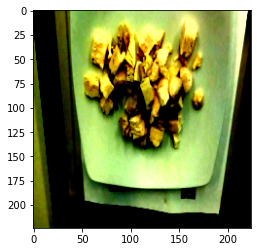

In [109]:
plt.imshow(torch.tensor(img_tensor[0]).permute(1,2,0))
plt.show()

In [115]:
smth.shape

(1, 3, 224, 224)

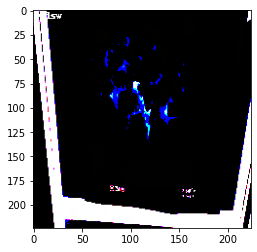

In [128]:
import matplotlib.pyplot as plt
plt.imshow(torch.tensor(smth[0]).permute(1,2,0))
plt.show()